## Task2:- Predicting House Prices with Linear Regression.

## Description:
##### The objective of this project is to build a predictive model using linear regression to estimate a
##### numerical outcome based on a dataset with relevant features. Linear regression is a
##### fundamental machine learning algorithm, and this project provides hands-on experience in
##### developing, evaluating, and interpreting a predictive model.


## Key Concepts and Challenges:
##### 1.Data Collection: Obtain a dataset with numerical features and a target variable for
##### prediction.

##### 2.Data Exploration and Cleaning: Explore the dataset to understand its structure, handle
##### missing values, and ensure data quality.

##### 3.Feature Selection: Identify relevant features that may contribute to the predictive model.
##### Model Training: Implement linear regression using a machine learning library (e.g., ScikitLearn).

##### 4.Model Evaluation: Evaluate the model's performance on a separate test dataset using
##### metrics such as Mean Squared Error or R-squared.

##### 5.Visualization: Create visualizations to illustrate the relationship between the predicted and
##### actual values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Analysing the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [6]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [8]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


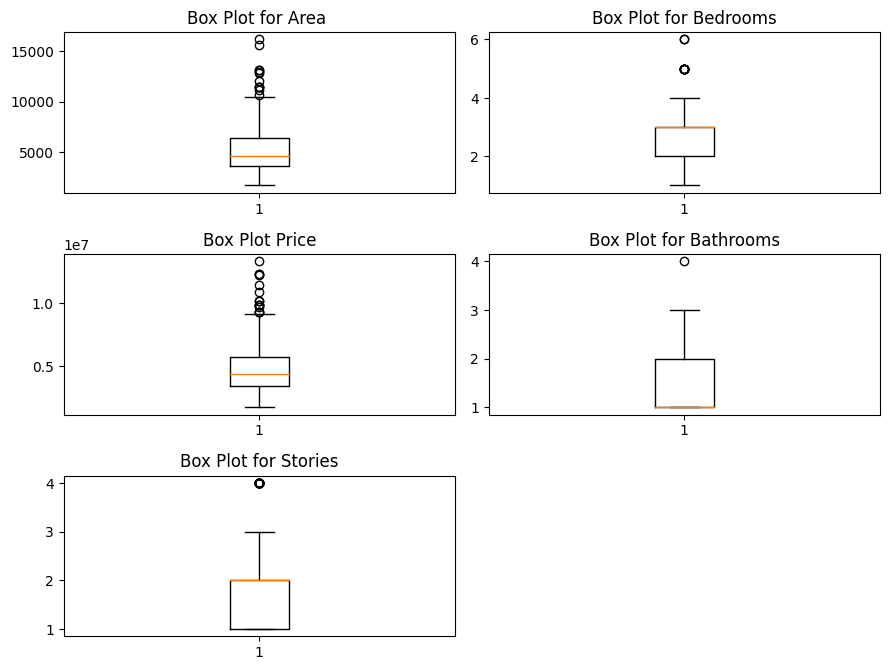

In [9]:
fig = plt.figure(figsize=(9,11))
ax1 = fig.add_subplot(5,2,1)
ax1.boxplot(data['area'])
ax1.set_title('Box Plot for Area ')

ax2 = fig.add_subplot(5,2,2)
ax2.boxplot(data['bedrooms'])
ax2.set_title('Box Plot for Bedrooms')

ax3 = fig.add_subplot(5,2,3)
ax3.boxplot(data['price'])
ax3.set_title('Box Plot Price')

ax4 = fig.add_subplot(5,2,4)
ax4.boxplot(data['bathrooms'])
ax4.set_title('Box Plot for Bathrooms')

ax5 = fig.add_subplot(5,2,5)
ax5.boxplot(data['stories'])
ax5.set_title('Box Plot for Stories')

#plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.tight_layout()
plt.show()

In [10]:
#remove outliers from area 
# outlier treatment for price
#Q1 is the 25% and Q3 is 75% of data, Q2 is 50% of data

Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)] # drop rows that include outliers

In [11]:
#remove outliers from price 
# outlier treatment for price
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]

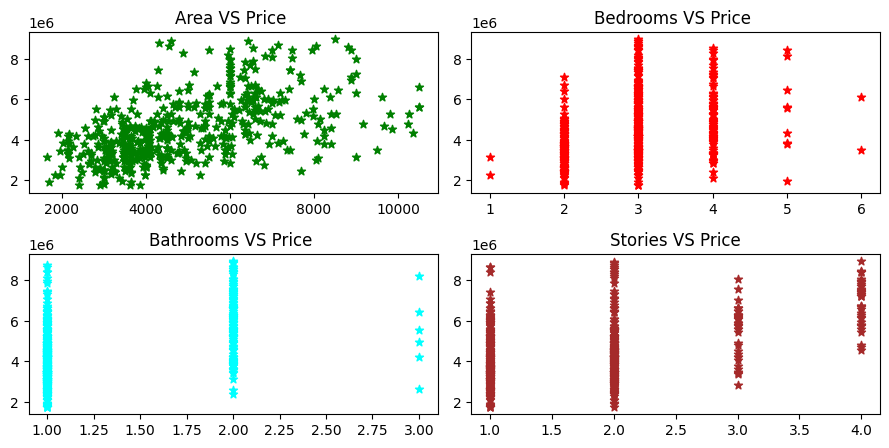

In [12]:
fig = plt.figure(figsize=(9,11))
ax1 = fig.add_subplot(5,2,1)
ax1.scatter(data['area'],data['price'],marker='*' ,color='green')
ax1.set_title('Area VS Price ')

ax2 = fig.add_subplot(5,2,2)
ax2.scatter(data['bedrooms'],data['price'],marker='*' ,color='red')
ax2.set_title('Bedrooms VS Price ')

ax3 = fig.add_subplot(5,2,3)
ax3.scatter(data['bathrooms'],data['price'],marker='*' ,color='cyan')
ax3.set_title('Bathrooms VS Price ')

ax4 = fig.add_subplot(5,2,4)
ax4.scatter(data['stories'],data['price'],marker='*' ,color='brown')
ax4.set_title('Stories VS Price')


#plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.tight_layout()
plt.show()

In [13]:
names_of_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

#convert values in this list into values


data['mainroad']=data['mainroad'].replace({'yes':1,'no':0})
data['guestroom']=data['guestroom'].replace({'yes':1,'no':0})
data['basement']=data['basement'].replace({'yes':1,'no':0})
data['hotwaterheating']=data['hotwaterheating'].replace({'yes':1,'no':0})
data['airconditioning']=data['airconditioning'].replace({'yes':1,'no':0})
data['prefarea']=data['prefarea'].replace({'yes':1,'no':0})
data['furnishingstatus']=data['furnishingstatus'].replace({'furnished':1,'semi-furnished':0.5,'unfurnished':0})

In [16]:
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1.0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1.0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0.5
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,0.5
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,0.0


In [17]:
x = np.array(data[['area','bedrooms','bathrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']])
y = np.array(data['price'])
print(x.shape,y.shape)

(518, 12) (518,)


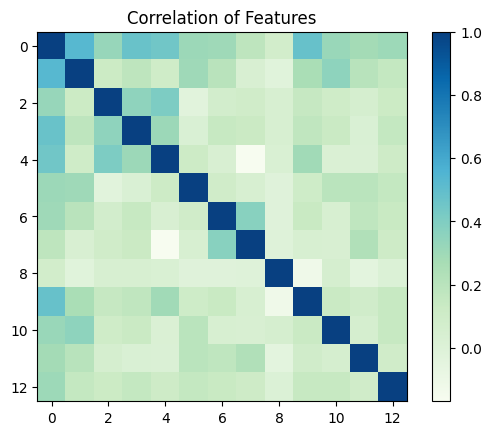

In [18]:
plt.imshow(data.corr(),cmap='GnBu',interpolation='nearest')
plt.colorbar()
plt.title('Correlation of Features')
plt.show()

In [21]:
# We specify this so that the train and test data set always have the same rows, respectively
from sklearn.model_selection import train_test_split
np.random.seed(0)

data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100) #split data into 70% for training and 30% for testing
y_train = data_train.pop('price') # y is the price feature
x_train = data_train # x is all features not include price

x_test = data_test
y_test = data_test.pop('price')

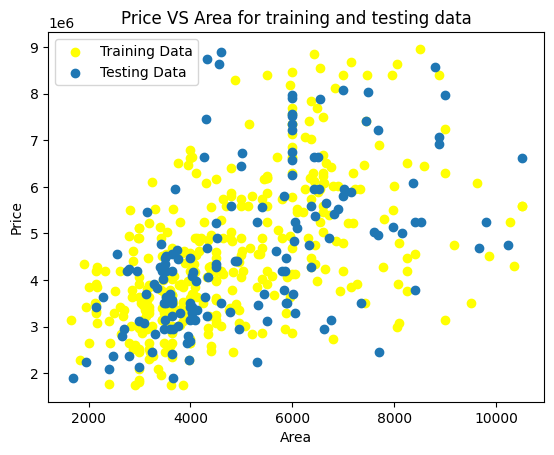

In [22]:
#plot train and test data 
plt.scatter(x_train['area'],y_train,color='yellow',label='Training Data',alpha=0.99)
plt.scatter(x_test['area'],y_test,label='Testing Data')
plt.legend()
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price VS Area for training and testing data')
plt.show()

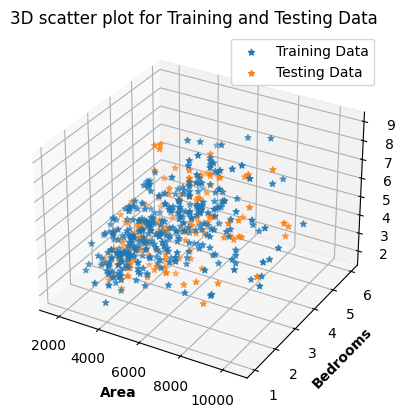

In [23]:
figure=plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(x_train['area'],x_train['bedrooms'],y_train,label='Training Data',marker='*')
ax.scatter3D(x_test['area'],x_test['bedrooms'],y_test,label='Testing Data',marker='*')

ax.set_xlabel('Area',fontweight='bold')
ax.set_ylabel('Bedrooms',fontweight='bold')
ax.set_zlabel('Price',fontweight='bold')
plt.title('3D scatter plot for Training and Testing Data ')
plt.legend()
plt.show()

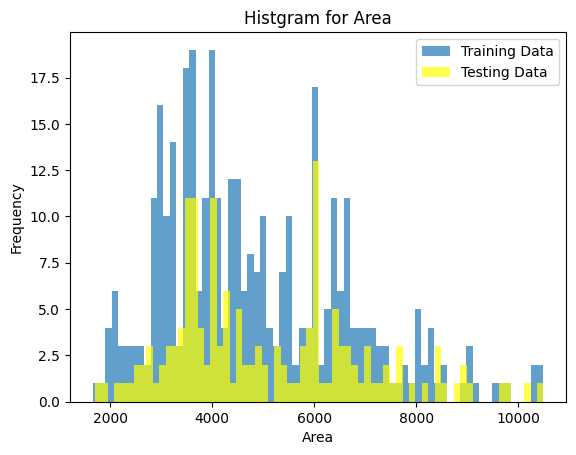

In [24]:
plt.hist(x_train['area'],bins=70,histtype='bar',alpha=0.7,label='Training Data')
plt.hist(x_test['area'],bins=70,alpha=0.7,label='Testing Data',color='yellow')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Histgram for Area')
plt.legend()
plt.show()

In [31]:
#building a model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)
accuracy= model.score(x_test,y_test)
print('Weights : \n',model.coef_)
print('Bias : \n',model.intercept_)
print('Accuracy \n',accurecy)

Weights : 
 [2.61753722e+02 8.62611434e+04 7.52850731e+05 4.02193289e+05
 3.77833268e+05 4.14458197e+05 2.84108569e+05 8.71772159e+05
 7.58526915e+05 1.44991642e+05 4.85650478e+05 4.15072812e+05]
Bias : 
 197350.56868867204
Accuracy 
 0.6992946944032823


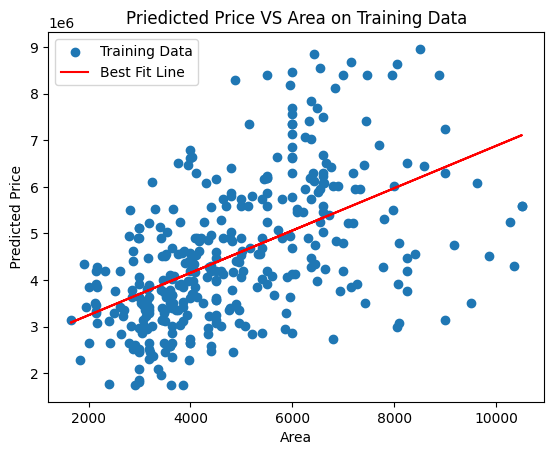

In [32]:
fet=x_train[['area','bedrooms','bathrooms','stories']]
price=y_train
plt.scatter(x_train['area'],y_train,label='Training Data')
m,b=np.polyfit(fet['area'],price,1) # for draw best fit line , m is the slope of line and b is the intercopt for y axis
plt.plot(fet['area'],m*fet['area']+b,color='red',label='Best Fit Line')
plt.xlabel('Area')
plt.ylabel(' Predicted Price ')
plt.title('Priedicted Price VS Area on Training Data')
plt.legend()
#plt.plot([ min(x_train['area']) ,max(x_train['area'])],[min(y_predicted),max(y_predicted)],color='green' )
plt.show()

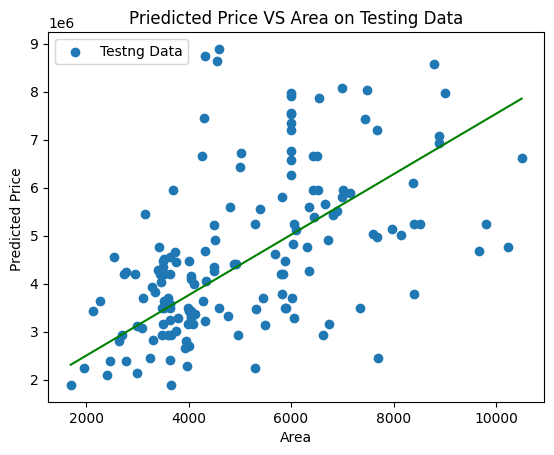

In [33]:
fet=x_test[['area','bedrooms','bathrooms','stories']]
price=y_test
plt.scatter(x_test['area'],y_test,label='Testng Data')
#m,b=np.polyfit(fet['area'],price,1) # for draw best fit line , m is the slope of line and b is the intercopt for y axis
#plt.plot(fet['area'],m*fet['area']+b,color='red',label='Best Fit Line')
plt.xlabel('Area')
plt.ylabel('Predicted Price ')
plt.title('Priedicted Price VS Area on Testing Data')
plt.legend()
plt.plot([ min(x_test['area']) ,max(x_test['area'])],[min(y_predicted),max(y_predicted)],color='green',label='Best Fit Line' )
plt.show()